In [122]:
# Data feature selection
import pandas as pd
import numpy as np

data = pd.read_csv("final.csv", index_col=0)

In [123]:
data.head()

,Id,idhogar,Target,hacdor,hacapo,v14a,refrig,paredblolad,paredzocalo,paredpreb,...,escolari-min,escolari-max,escolari-sum,escolari-std,escolari-range_,age-min,age-max,age-sum,age-std,age-range_
0,ID_279628684,21eb7fcc1,4,0,0,1,1,1,0,0,...,10,10,10,0.000000,0,43,43,43,0.000000,0
1,ID_f29eb3ddd,0e5d7a658,4,0,0,1,1,0,0,0,...,12,12,12,0.000000,0,67,67,67,0.000000,0
2,ID_68de51c94,2c7317ea8,4,0,0,1,1,0,0,0,...,11,11,11,0.000000,0,92,92,92,0.000000,0
3,ID_ec05b1a7b,2b58d945f,4,0,0,1,1,1,0,0,...,2,11,33,4.272002,9,8,38,100,14.899664,30
4,ID_1284f8aad,d6dae86b7,4,1,0,1,1,1,0,0,...,0,11,23,5.123475,11,7,30,76,11.690452,23


In [124]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2973 entries, 0 to 2972
Columns: 217 entries, Id to age-range_
dtypes: bool(1), float64(13), int64(201), object(2)
memory usage: 4.9+ MB


In [125]:
data.describe(include='all')

,Id,idhogar,Target,hacdor,hacapo,v14a,refrig,paredblolad,paredzocalo,paredpreb,...,escolari-min,escolari-max,escolari-sum,escolari-std,escolari-range_,age-min,age-max,age-sum,age-std,age-range_
count,2973,2973,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,...,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000
unique,2973,2973,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,ID_15a877536,a944ce6f8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,3.359233,0.021191,0.012109,0.994282,0.952573,0.603431,0.077699,0.183317,...,4.419442,10.508577,23.103263,3.074326,6.089136,25.129499,52.891019,110.140262,14.022540,27.761520
std,NaN,NaN,0.987870,0.144044,0.109391,0.075414,0.212586,0.489267,0.267743,0.386991,...,4.436783,4.066036,13.622448,2.328856,4.669760,22.501855,16.385340,50.597781,8.773408,18.612557
min,NaN,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,18.000000,0.000000,0.000000
25%,NaN,NaN,3.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,7.000000,13.000000,1.154701,2.000000,7.000000,40.000000,72.000000,7.071068,10.000000
50%,NaN,NaN,4.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,4.000000,11.000000,21.000000,3.000000,6.000000,18.000000,53.000000,105.000000,15.556349,30.000000
75%,NaN,NaN,4.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,6.000000,14.000000,31.000000,4.509250,9.000000,39.000000,64.000000,140.000000,19.655364,39.000000


In [126]:
#Split data into variables types - boolean, categorical, continuous, ID
bool_var = list(data.select_dtypes('bool'))
cont_var = list(data.select_dtypes('float64'))
cat_var = list(data.select_dtypes('int64'))
id_var = list(data.select_dtypes('object'))

In [127]:
###1. Chi-Squared Test on Categorical Variables
#Use Chi-square test to find which categorical variables have a significant relationship with target
#feature.

#Get dataset with only categorical variables
cat_data = data[id_var + cat_var + bool_var]
cat_data.head()

,Id,idhogar,Target,hacdor,hacapo,v14a,refrig,paredblolad,paredzocalo,paredpreb,...,mobilephone-range_,escolari-min,escolari-max,escolari-sum,escolari-range_,age-min,age-max,age-sum,age-range_,v2a1-missing
0,ID_279628684,21eb7fcc1,4,0,0,1,1,1,0,0,...,0,10,10,10,0,43,43,43,0,False
1,ID_f29eb3ddd,0e5d7a658,4,0,0,1,1,0,0,0,...,0,12,12,12,0,67,67,67,0,False
2,ID_68de51c94,2c7317ea8,4,0,0,1,1,0,0,0,...,0,11,11,11,0,92,92,92,0,False
3,ID_ec05b1a7b,2b58d945f,4,0,0,1,1,1,0,0,...,0,2,11,33,9,8,38,100,30,False
4,ID_1284f8aad,d6dae86b7,4,1,0,1,1,1,0,0,...,0,0,11,23,11,7,30,76,23,False


In [128]:
#Get index of variables that should be statistically treated as continuous data because they have more than 5 unique values.
num_unique = data[cat_var].nunique()
s = num_unique[num_unique > 5]
cont_fcat = s.index.tolist()
print(s)

edjefe               22
edjefa               22
rooms                11
r4h1                  6
r4h2                  9
r4h3                  9
r4m1                  6
r4m2                  7
r4m3                  9
r4t1                  7
r4t2                 11
r4t3                 13
tamhog               13
tamviv               14
hhsize               13
hogar_nin            10
hogar_adul           10
hogar_total          13
bedrooms              7
qmobilephone         11
hhsize-diff           9
v18q-sum             11
v18q-count           13
male-sum              9
female-sum            9
estadocivil1-sum      8
estadocivil7-sum     10
parentesco3-sum      11
parentesco4-sum       6
parentesco6-sum       8
parentesco11-sum      6
instlevel1-sum        6
instlevel2-sum        6
instlevel3-sum        7
instlevel4-sum        6
instlevel8-sum        6
escolari-min         20
escolari-max         22
escolari-sum         78
escolari-range_      22
age-min              93
age-max         

In [129]:
cont_var_2 = cont_var + cont_fcat
cat_var_2 = list(set(cat_var) - set(cont_fcat))
cat_var_2

['tipovivi5',
 'television',
 'dis-range_',
 'instlevel9-min',
 'hacdor',
 'parentesco2-min',
 'pisonatur',
 'epared3',
 'dis-sum',
 'estadocivil1-min',
 'paredmad',
 'v18q-min',
 'male-max',
 'parentesco10-min',
 'energcocinar3',
 'eviv3',
 'male-range_',
 'estadocivil2-max',
 'estadocivil1-max',
 'area1',
 'area2',
 'parentesco4-min',
 'parentesco3-max',
 'estadocivil2-range_',
 'sanitario6',
 'techootro',
 'estadocivil3-max',
 'parentesco12-max',
 'lugar3',
 'parentesco12-sum',
 'energcocinar2',
 'sanitario2',
 'instlevel8-max',
 'tipovivi1',
 'pisonotiene',
 'instlevel6-max',
 'Target',
 'public',
 'epared1',
 'instlevel5-sum',
 'parentesco7-max',
 'v18q-range_',
 'tipovivi4',
 'lugar2',
 'abastaguadentro',
 'instlevel5-max',
 'eviv1',
 'estadocivil7-min',
 'instlevel2-max',
 'parentesco1-min',
 'parentesco4-max',
 'instlevel4-range_',
 'elimbasu2',
 'estadocivil5-sum',
 'instlevel9-max',
 'techocane',
 'sanitario5',
 'lugar6',
 'parentesco5-max',
 'estadocivil5-range_',
 'techoent

In [130]:
#Chi Square Test Script: http://www.handsonmachinelearning.com/blog/2AeuRL/chi-square-feature-selection-in-python

import scipy.stats as stats
from scipy.stats import chi2_contingency

class ChiSquare:
    def __init__(self, dataframe):
        self.df = dataframe
        self.p = None #P-Value
        self.chi2 = None #Chi Test Statistic
        self.dof = None
        
        self.dfObserved = None
        self.dfExpected = None
    
    #Compares the p-value against this threshold and determines if variable is as important feature.
    #Input: the name of a column X and the alpha value(threshold to determine if to reject/accept null hypothesis 
    #of the Chi-Square test of independence)
    #to_remove is a list of columns to be removed
    #Output: Print if the variable X is important or if not. 
    def _print_chisquare_result(self, colX, alpha, to_remove):
        result = ""
        if self.p<alpha:
            result="{0} is IMPORTANT for Prediction".format(colX)
        else:
            result="{0} is NOT an important predictor. (Discard {0} from model)".format(colX)
            to_remove = to_remove.append(colX)

        print(result)
        
        
    #Input: two column names, colX and colY - the two variables being compared. 
    #colY is target Feature, ColX is the feature you are testing against. 
    #The last variable is Alpha which we default to 0.05.
    def TestIndependence(self,colX,colY, to_remove, alpha=0.05):
        #convert colX and colY to string types
        X = self.df[colX].astype(str)
        Y = self.df[colY].astype(str)
        
        #Calculate frequency counts using the pandas crosstab function. 
        #The observed and expected frequencies are stored in the dfObserved and dfExpected dataframes as they are calculated. 
        self.dfObserved = pd.crosstab(Y,X) 
        
        #use the scipy function chi2_contingency to calculate the Chi-Statistic, P-Value, Degrees of Freedom and the expected frequencies
        chi2, p, dof, expected = stats.chi2_contingency(self.dfObserved.values)
        self.p = p
        self.chi2 = chi2
        self.dof = dof 
        
        self.dfExpected = pd.DataFrame(expected, columns=self.dfObserved.columns, index = self.dfObserved.index)
        
        self._print_chisquare_result(colX,alpha, to_remove)

In [131]:
#Initialize ChiSquare Class
cT = ChiSquare(cat_data)

#Feature Selection
testColumns = (bool_var + cat_var_2)
testColumns.remove('Target')
remove_list = []
chi2_summary = pd.DataFrame(columns=['variable_name', 'chi2', 'p-val', 'dof'])
for var in testColumns:
    cT.TestIndependence(colX=var,colY="Target",to_remove=remove_list)
    chi2_summary.loc[len(chi2_summary)] = [var, cT.chi2, cT.p, cT.dof]

v2a1-missing is IMPORTANT for Prediction
tipovivi5 is IMPORTANT for Prediction
television is IMPORTANT for Prediction
dis-range_ is IMPORTANT for Prediction
instlevel9-min is NOT an important predictor. (Discard instlevel9-min from model)
hacdor is IMPORTANT for Prediction
parentesco2-min is NOT an important predictor. (Discard parentesco2-min from model)
pisonatur is IMPORTANT for Prediction
epared3 is IMPORTANT for Prediction
dis-sum is IMPORTANT for Prediction
estadocivil1-min is NOT an important predictor. (Discard estadocivil1-min from model)
paredmad is IMPORTANT for Prediction
v18q-min is IMPORTANT for Prediction
male-max is NOT an important predictor. (Discard male-max from model)
parentesco10-min is NOT an important predictor. (Discard parentesco10-min from model)
energcocinar3 is IMPORTANT for Prediction
eviv3 is IMPORTANT for Prediction
male-range_ is NOT an important predictor. (Discard male-range_ from model)
estadocivil2-max is IMPORTANT for Prediction
estadocivil1-max is

In [132]:
#Print list of variables to remove
remove_list

['instlevel9-min',
 'parentesco2-min',
 'estadocivil1-min',
 'male-max',
 'parentesco10-min',
 'male-range_',
 'parentesco4-min',
 'sanitario6',
 'techootro',
 'parentesco12-max',
 'parentesco12-sum',
 'tipovivi1',
 'instlevel6-max',
 'public',
 'parentesco7-max',
 'v18q-range_',
 'lugar2',
 'estadocivil7-min',
 'parentesco1-min',
 'lugar6',
 'parentesco5-max',
 'techoentrepiso',
 'paredother',
 'parentesco10-sum',
 'sanitario1',
 'techozinc',
 'parentesco5-min',
 'parentesco8-min',
 'elimbasu5',
 'instlevel6-min',
 'parentesco11-max',
 'coopele',
 'estadocivil2-min',
 'parentesco9-min',
 'parentesco11-min',
 'parentesco10-max',
 'mobilephone-range_',
 'parentesco1-max',
 'instlevel7-min',
 'parentesco9-sum',
 'parentesco7-min',
 'parentesco8-max',
 'parentesco1-sum',
 'parentesco6-min',
 'planpri',
 'parentesco9-max',
 'parentesco3-min',
 'instlevel5-min',
 'estadocivil5-min',
 'elimbasu6',
 'instlevel6-sum',
 'pisoother',
 'abastaguafuera',
 'tipovivi3',
 'parentesco12-min']

In [133]:
chi2_summary.sort_values('p-val', ascending = False).head(29)

,variable_name,chi2,p-val,dof
156,parentesco12-min,0.000000,1.000000,0
41,v18q-range_,0.000000,1.000000,0
114,parentesco7-min,0.000000,1.000000,0
22,parentesco4-min,0.000000,1.000000,0
118,parentesco1-sum,0.000000,1.000000,0
120,parentesco6-min,0.000000,1.000000,0
99,parentesco11-min,0.000000,1.000000,0
97,parentesco9-min,0.000000,1.000000,0
133,parentesco3-min,0.000000,1.000000,0
14,parentesco10-min,0.000000,1.000000,0


Notice that the top 17 p-valued variables have 0 chi-squared values. We hypothesize that this is because each variable only has one unique value of 0.00. Let us explore the data below:

In [134]:
cat_data = data[id_var + cat_var_2 + bool_var]
cat_data.describe()

,tipovivi5,television,dis-range_,instlevel9-min,hacdor,parentesco2-min,pisonatur,epared3,dis-sum,estadocivil1-min,...,estadocivil3-min,pisocemento,instlevel8-min,paredzocalo,tipovivi3,energcocinar1,estadocivil6-max,etecho3,epared2,parentesco12-min
count,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.0,2973.000000,2973.000000,2973.000000,2973.0,...,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.0
mean,0.085436,0.263370,0.134544,0.006391,0.021191,0.0,0.001009,0.587958,0.183989,0.0,...,0.089136,0.212916,0.057181,0.077699,0.180626,0.005045,0.105617,0.588631,0.309788,0.0
std,0.279576,0.440536,0.341294,0.079700,0.144044,0.0,0.031755,0.492285,0.457610,0.0,...,0.284987,0.409438,0.232228,0.267743,0.384772,0.070864,0.307399,0.492165,0.462484,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0
75%,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,3.000000,0.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


Sure enough, we notice that the min/max for the values are all 0.00. Hence, it makes sense to remove them as recommended by the chi-squared test. 

Below, we explore the variables with highest chi-square values and lowest p-values just to get an idea of which variables might be more relevant to our model.

In [135]:
chi2_summary.sort_values('p-val', ascending = True).head(20)

,variable_name,chi2,p-val,dof
33,instlevel8-max,343.768796,3.333387e-74,3
112,cielorazo,269.867887,3.296470e-58,3
16,eviv3,264.249953,5.412945e-57,3
8,epared3,240.469091,7.534682e-52,3
101,pisomoscer,231.291915,7.269167e-50,3
87,instlevel8-range_,230.663695,9.938377e-50,3
48,instlevel2-max,215.081289,2.322406e-46,3
154,etecho3,213.480363,5.151901e-46,3
129,paredblolad,203.405106,7.751450e-44,3
12,v18q-min,183.167940,1.825172e-39,3


Finally, we remove the variables that were recommended for removal by the chi-square test.

In [136]:
cat_data_selected = cat_data[cat_data.columns.difference(remove_list)]
cat_data_selected.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2973 entries, 0 to 2972
Columns: 105 entries, Id to v2a1-missing
dtypes: bool(1), int64(102), object(2)
memory usage: 2.4+ MB


### 2. Correlation Matrix for Continuous Variables

In [137]:
#Get Continuous Variables from Data
cont_data = data[id_var + cont_var_2]
cont_data_noid = data[cont_var_2]
cont_data.head()

,Id,idhogar,v2a1,dependency,meaneduc,overcrowding,v18q1,phones-per-capita,tablets-per-capita,rooms-per-capita,...,instlevel4-sum,instlevel8-sum,escolari-min,escolari-max,escolari-sum,escolari-range_,age-min,age-max,age-sum,age-range_
0,ID_279628684,21eb7fcc1,190000.0,0.0,10.0,1.000000,0.0,1.00,0.00,3.00,...,1,0,10,10,10,0,43,43,43,0
1,ID_f29eb3ddd,0e5d7a658,135000.0,8.0,12.0,1.000000,1.0,1.00,1.00,4.00,...,0,1,12,12,12,0,67,67,67,0
2,ID_68de51c94,2c7317ea8,0.0,8.0,11.0,0.500000,0.0,0.00,0.00,8.00,...,0,0,11,11,11,0,92,92,92,0
3,ID_ec05b1a7b,2b58d945f,180000.0,1.0,11.0,1.333333,1.0,0.75,0.25,1.25,...,1,0,2,11,33,9,8,38,100,30
4,ID_1284f8aad,d6dae86b7,130000.0,1.0,10.0,4.000000,0.0,0.25,0.00,0.50,...,1,0,0,11,23,11,7,30,76,23


In [138]:
print(cont_data_noid.corr())

                        v2a1  dependency  meaneduc  overcrowding     v18q1  \
v2a1                1.000000   -0.109251  0.274625     -0.002674  0.193683   
dependency         -0.109251    1.000000 -0.164728     -0.104365 -0.080267   
meaneduc            0.274625   -0.164728  1.000000     -0.103958  0.323169   
overcrowding       -0.002674   -0.104365 -0.103958      1.000000 -0.060720   
v18q1               0.193683   -0.080267  0.323169     -0.060720  1.000000   
phones-per-capita   0.083683   -0.206604  0.262099     -0.317500  0.164730   
tablets-per-capita  0.176118   -0.041197  0.331145     -0.145521  0.863220   
rooms-per-capita   -0.015468    0.269584  0.069759     -0.664111 -0.003088   
rent-per-capita     0.829240   -0.098385  0.253816     -0.092661  0.122283   
rez_esc-min              NaN         NaN       NaN           NaN       NaN   
rez_esc-max        -0.011806    0.021939 -0.138290      0.239159 -0.075739   
escolari-std        0.107092   -0.193158  0.254637      0.244643

In [139]:
# Create correlation matrix
corr_matrix = cont_data_noid.corr()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(abs(upper[column]) > 0.95)]
to_drop

['tamhog', 'hhsize', 'hogar_total', 'v18q-count', 'male-sum', 'female-sum']

In [140]:
corr_matrix['hhsize']

v2a1                  0.002684
dependency           -0.174214
meaneduc              0.040215
overcrowding          0.616964
v18q1                 0.080227
phones-per-capita    -0.255839
tablets-per-capita   -0.085816
rooms-per-capita     -0.663448
rent-per-capita      -0.149796
rez_esc-min                NaN
rez_esc-max           0.295959
escolari-std          0.385025
age-std               0.510215
edjefe                0.047064
edjefa               -0.115839
rooms                 0.232868
r4h1                  0.446676
r4h2                  0.584886
r4h3                  0.740905
r4m1                  0.451933
r4m2                  0.637868
r4m3                  0.744973
r4t1                  0.591614
r4t2                  0.837013
r4t3                  0.996884
tamhog                1.000000
tamviv                0.926667
hhsize                1.000000
hogar_nin             0.763983
hogar_adul            0.685373
hogar_total           1.000000
bedrooms              0.348331
qmobilep

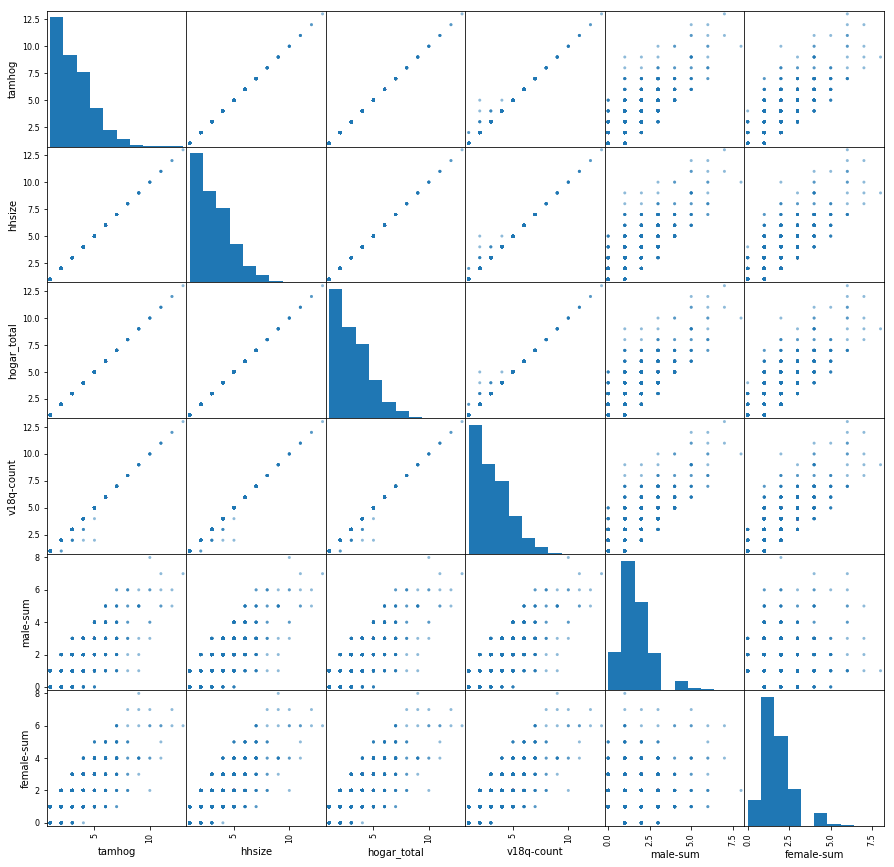

In [90]:
import matplotlib.pyplot as plt

pd.plotting.scatter_matrix(cont_data[['tamhog', 'hhsize', 'hogar_total', 'v18q-count', 'male-sum', 'female-sum']], figsize=(15, 15))
plt.show()

C:\Users\Wen Qing\Anaconda2\envs\BT4240\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Wen Qing\Anaconda2\envs\BT4240\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Wen Qing\Anaconda2\envs\BT4240\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\Wen Qing\Anaconda2\envs\BT4240\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axi

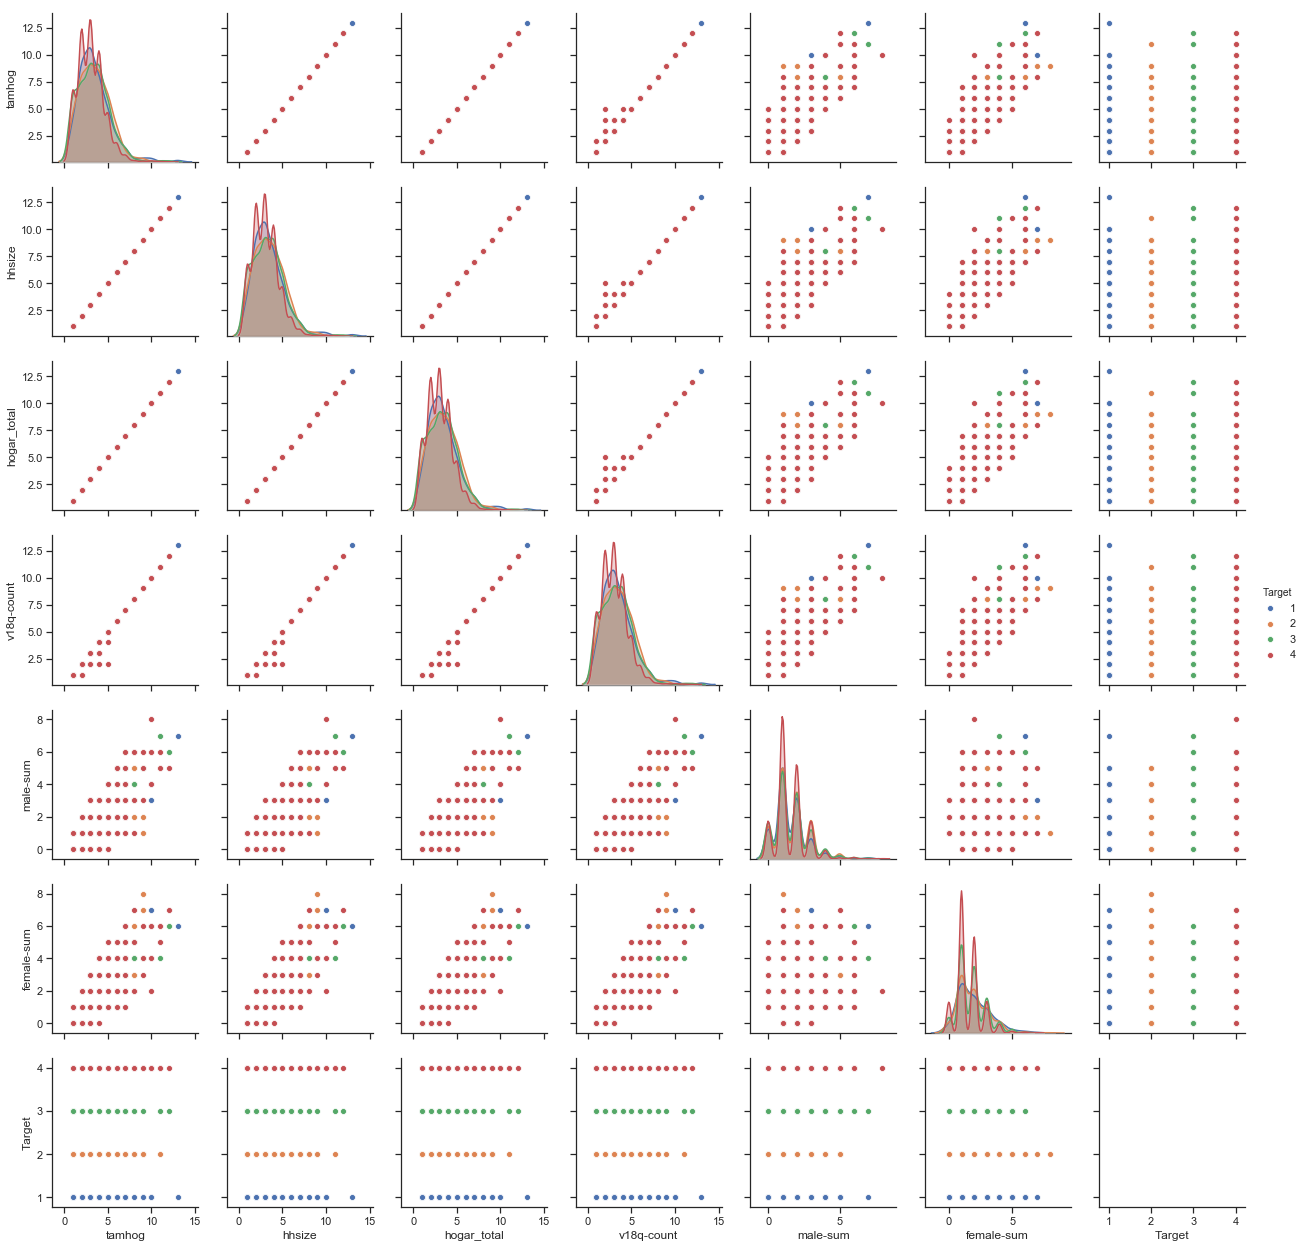

In [113]:
import seaborn as sns
sns.set(style="ticks")

significant = cont_data[['tamhog', 'hhsize', 'hogar_total', 'v18q-count', 'male-sum', 'female-sum']]
scatter_data = pd.concat([significant, cat_data[['Target']]], axis=1, join_axes=[significant.index])

sns.pairplot(scatter_data, hue="Target")

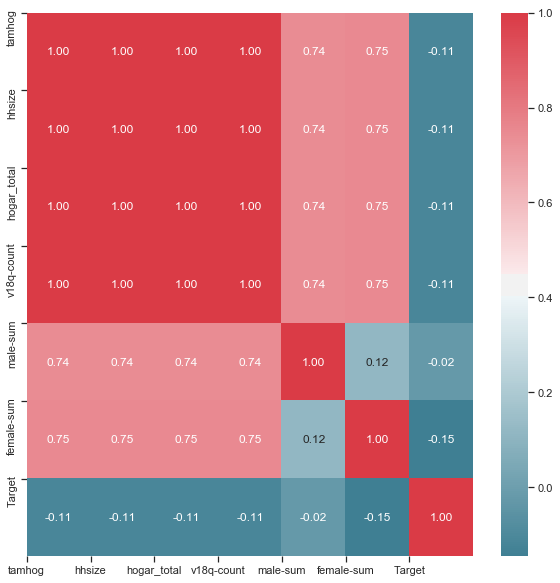

In [115]:
corr = scatter_data.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(10, 10))
#Generate Color Map
colormap = sns.diverging_palette(220, 10, as_cmap=True)
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()

From the correlation matrix, we observe that only 2 variable pairs have relatively high correlations:
    1. v2a1 and rent-per-capita
    2. v18q1 and tablets-per-capita
    
Which are expected since the latter variable in both pairs were features engineered from the former variable.

In particular, dependancy and rez_esc-max seem to have lower levels of correlation with all other features. However, we decide to keep these as they represent the dependacy rate of members of the household, and maximum years behind in school by a member of the household - which intuitively might help in predicting our target feature.

We also notice that rez_esc-min has NaN correlation with any variable - which suggests that it might have only one single value - 0.0. Let us explore that hypothesis:

In [70]:
cont_data_noid.describe()

,v2a1,dependency,meaneduc,overcrowding,v18q1,phones-per-capita,tablets-per-capita,rooms-per-capita,rent-per-capita,rez_esc-min,...,instlevel4-sum,instlevel8-sum,escolari-min,escolari-max,escolari-sum,escolari-range_,age-min,age-max,age-sum,age-range_
count,2.973000e+03,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.0,...,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000
mean,5.159637e+04,1.334008,9.150342,1.375631,0.299697,0.772636,0.100110,1.834929,19500.917430,0.0,...,0.595358,0.449041,4.419442,10.508577,23.103263,6.089136,25.129499,52.891019,110.140262,27.761520
std,1.116788e+05,2.145635,4.387024,0.745672,0.655233,0.341416,0.230905,1.153828,48436.238407,0.0,...,0.830163,0.753978,4.436783,4.066036,13.622448,4.669760,22.501855,16.385340,50.597781,18.612557
min,0.000000e+00,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.166667,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,18.000000,0.000000
25%,0.000000e+00,0.000000,6.000000,1.000000,0.000000,0.500000,0.000000,1.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,7.000000,13.000000,2.000000,7.000000,40.000000,72.000000,10.000000
50%,0.000000e+00,0.500000,8.666667,1.333333,0.000000,0.800000,0.000000,1.500000,0.000000,0.0,...,0.000000,0.000000,4.000000,11.000000,21.000000,6.000000,18.000000,53.000000,105.000000,30.000000
75%,5.159637e+04,1.000000,12.000000,1.666667,0.000000,1.000000,0.000000,2.000000,19500.917430,0.0,...,1.000000,1.000000,6.000000,14.000000,31.000000,9.000000,39.000000,64.000000,140.000000,39.000000
max,2.353477e+06,8.000000,37.000000,6.000000,6.000000,3.000000,3.000000,9.000000,1000000.000000,0.0,...,5.000000,5.000000,21.000000,21.000000,116.000000,21.000000,94.000000,97.000000,373.000000,93.000000


Sure enough, the min, max for rez_esc-min appears to be the same. We should remove this variable as it adds no value to our dataset.

In [141]:
cont_data_noid = cont_data_noid.drop(columns = to_drop)

In [161]:
# Create correlation matrix
corr_matrix_2 = cont_data_noid.corr()

# Select upper triangle of correlation matrix
upper_2 = corr_matrix_2.where(np.triu(np.ones(corr_matrix_2.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
highest = [column for column in upper_2.columns if any(abs(upper_2[column]) > 0.90)]
lowest = [column for column in upper_2.columns if any(abs(upper_2[column]) < 0.003)]
highest
lowest

['overcrowding',
 'r4t1',
 'hhsize-diff',
 'estadocivil1-sum',
 'parentesco3-sum',
 'instlevel1-sum',
 'escolari-max',
 'escolari-range_',
 'age-min']

In [176]:
upper_2['age-min']

v2a1                 -0.112863
dependency            0.474968
meaneduc             -0.187897
overcrowding         -0.515354
v18q1                -0.124772
phones-per-capita     0.129498
tablets-per-capita    0.000455
rooms-per-capita      0.652666
rent-per-capita       0.006705
rez_esc-min                NaN
rez_esc-max          -0.212942
escolari-std         -0.537572
age-std              -0.648162
edjefe               -0.053682
edjefa               -0.023435
rooms                -0.027143
r4h1                 -0.433835
r4h2                 -0.248997
r4h3                 -0.443521
r4m1                 -0.439833
r4m2                 -0.363250
r4m3                 -0.521820
r4t1                 -0.575201
r4t2                 -0.416692
r4t3                 -0.647959
tamviv               -0.617267
hogar_nin            -0.662242
hogar_adul           -0.263358
bedrooms             -0.126362
qmobilephone         -0.430141
hhsize-diff          -0.009151
v18q-sum             -0.214884
estadoci

In [178]:
scatter_data_2 = cont_data_noid[['escolari-range_','escolari-std','age-range_','age-std','estadocivil1-sum','r4t1', 'dependency','parentesco3-sum',
                                 'edjefa','age-min','tablets-per-capita']]

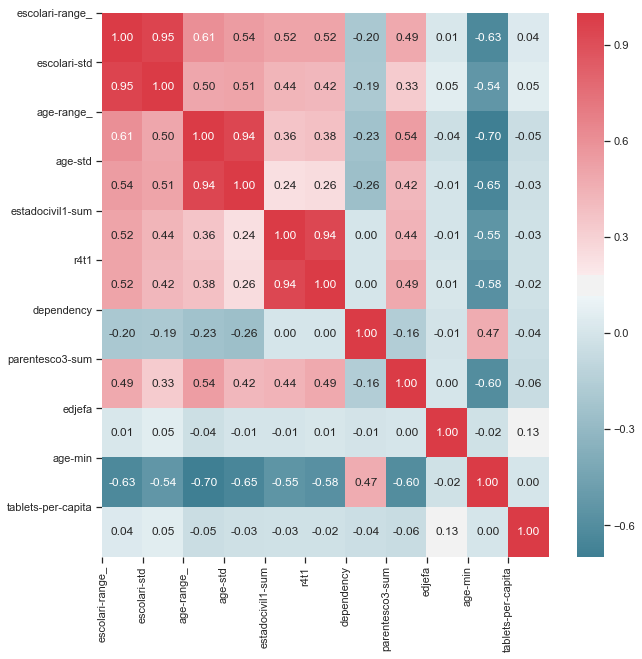

In [179]:
corr_2 = scatter_data_2.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(10, 10))
#Generate Color Map
colormap = sns.diverging_palette(220, 10, as_cmap=True)
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr_2, cmap=colormap, annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr_2.columns)), corr_2.columns);
#Apply yticks
plt.yticks(range(len(corr_2.columns)), corr_2.columns)
#show plot
plt.show()

In [180]:
cont_data = cont_data.drop(columns = to_drop)
cont_data_selected = cont_data[cont_data.columns.difference(['rez_esc-min'])]
cont_data_selected.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2973 entries, 0 to 2972
Data columns (total 52 columns):
Id                    2973 non-null object
age-max               2973 non-null int64
age-min               2973 non-null int64
age-range_            2973 non-null int64
age-std               2973 non-null float64
age-sum               2973 non-null int64
bedrooms              2973 non-null int64
dependency            2973 non-null float64
edjefa                2973 non-null int64
edjefe                2973 non-null int64
escolari-max          2973 non-null int64
escolari-min          2973 non-null int64
escolari-range_       2973 non-null int64
escolari-std          2973 non-null float64
escolari-sum          2973 non-null int64
estadocivil1-sum      2973 non-null int64
estadocivil7-sum      2973 non-null int64
hhsize-diff           2973 non-null int64
hogar_adul            2973 non-null int64
hogar_nin             2973 non-null int64
idhogar               2973 non-null object
ins

### Merge Categorical and Continuous Datasets

In [181]:
cont_data_selected = cont_data_selected.drop(columns = ['Id'] )
final_fs = cat_data_selected.merge(cont_data_selected, on = 'idhogar', how = 'left')
final_fs.head()

,Id,Target,abastaguadentro,abastaguano,area1,area2,cielorazo,computer,dis-max,dis-min,...,r4t3,rent-per-capita,rez_esc-max,rooms,rooms-per-capita,tablets-per-capita,tamviv,v18q-sum,v18q1,v2a1
0,ID_279628684,4,1,0,1,0,1,0,0,0,...,1,190000.0,0.0,3,3.00,0.00,1,0,0.0,190000.0
1,ID_f29eb3ddd,4,1,0,1,0,1,0,0,0,...,1,135000.0,0.0,4,4.00,1.00,1,1,1.0,135000.0
2,ID_68de51c94,4,1,0,1,0,1,0,1,1,...,1,0.0,0.0,8,8.00,0.00,1,0,0.0,0.0
3,ID_ec05b1a7b,4,1,0,1,0,1,0,0,0,...,4,45000.0,1.0,5,1.25,0.25,4,4,1.0,180000.0
4,ID_1284f8aad,4,1,0,1,0,1,0,0,0,...,4,32500.0,1.0,2,0.50,0.00,4,0,0.0,130000.0


In [182]:
final_fs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2973 entries, 0 to 2972
Columns: 155 entries, Id to v2a1
dtypes: bool(1), float64(12), int64(140), object(2)
memory usage: 3.5+ MB


In [183]:
final_fs.to_csv('final_fs_2.csv')

In [184]:
df2 = pd.read_csv("final_fs.csv", index_col=0)

In [185]:
final_fs.columns.difference(df2.columns)

Index(['age-sum', 'hhsize-diff'], dtype='object')

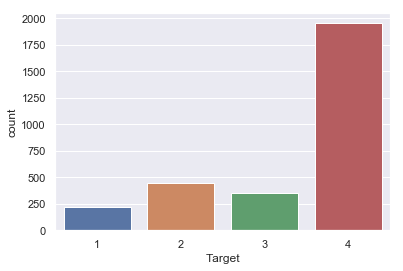

In [187]:
sns.set(style="darkgrid")
ax = sns.countplot(x="Target", data=final_fs)